# Example 6.2 


## Shear frame

The shear frame has a mass $m=1$ kg and stiffness $N=100$ N/m.

<center>
<img src="figures\shearframe.svg">
</center>


## State-space model

The state-space formulation of the system is:

$$
\mathbf{\dot{x}}(t) = \mathbf{A}\mathbf{x}(t) + \mathbf{B}\mathbf{f}(t)
$$

where

- $ \mathbf{x}(t) $ is the state vector, representing the system's state variables (displacements and velocities) at a given time.
- $ \mathbf{A} $ is the state matrix, which defines how the state evolves over time without time without force.
- $ \mathbf{B} $ is the input force matrix, which defines how external force affect the system's state.

## Discrete-time forward model

The state-space formulation in continuous time is an ODE. To solve this system numerically in discrete time, we can express it recursively as:

$$
\mathbf{x}_{k+1} = \mathbf{A}_\text{d} \mathbf{x}_{k} + \mathbf{B}_\text{d} \mathbf{f}_{k}
$$

where

- $ \Delta t$ is the chosen time step.
- $k $ is the index indicating the time step number $(k=0,1,2,3,\dots)$ and $t_k = k \Delta t$.
- $ \mathbf{x}_{k+1} $ represents the state vector at the next time step $ k+1 $.
- $ \mathbf{A}_\text{d} =\exp(\mathbf{A} \Delta t) $ is the discrete-time state matrix, obtained from the continuous-time matrix $ \mathbf{A} $ after discretization. NB! The matrix exponential function is used.
- $ \mathbf{B}_\text{d}=(\mathbf{A}_\text{d}-\mathbf{I}) \mathbf{A}^{-1} \mathbf{B}$ is the discrete-time input matrix.
- $ \mathbf{f}_{k} $ is the force at the current time step $k$, affecting the state at the next time step.
- $\mathbf{x}_0 $ is the initial condition of the system, representing the displacements and velocities of the system at the starting time.

The discrete-time forward model is a type of numerical integration is similar to Newmark's method.

## Discretization of input force

The discrete-time forward model assumes a "sample-and-hold" approximation for the force. 
This means that the force time history is sampled at regular intervals ($\Delta t$) and held constant between these sampling points, 
approximating the continuous signal by "stepping" through its values. This assumption simplifies the transition from continuous to discrete systems but introduces small inaccuracies, particularly when the signal changes rapidly between samples. The accuracy of this approximation depends on the sampling rate: smaller $\Delta t$ lead to a better approximation of the original signal.

We can illustrate this with a simple sine function. Try to change $\Delta t$ and observe how well it approximates the original time history.


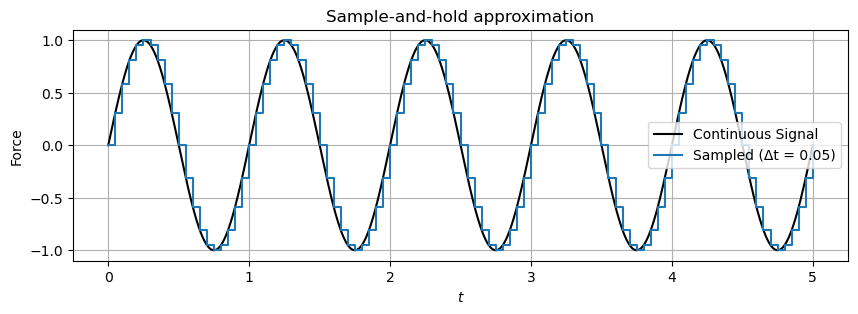

In [50]:
import numpy as np
import matplotlib.pyplot as plt

f=1 # Frequency of force

# Define a continuous signal (sine wave)
def sine_wave(t):
    return np.sin(2 * np.pi*f * t)

dt=0.05 # Time step

# Time for the continuous signal
t_continuous = np.linspace(0, 5, 10000)

# Plot the continuous signal
plt.figure(figsize=(10, 3))
plt.plot(t_continuous, sine_wave(t_continuous), label='Continuous Signal', color='black')

# Plot signals sampled with space dt
t_sampled = np.arange(0, 5 + dt, dt)
sampled_signal = sine_wave(t_sampled)
    
# Use the `step` function to create a stair plot
plt.step(t_sampled, sampled_signal, where='post', label=f'Sampled (Δt = {dt})')

# Add labels and legend
plt.title('Sample-and-hold approximation')
plt.xlabel('$t$')
plt.ylabel('Force')
plt.legend()
plt.grid(True)
plt.show()


## Animation of mode shapes

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Use this line for inline animations in Jupyter notebook
# If you want interactive animations, use %matplotlib notebook instead
%matplotlib inline  

idx_plot=1

mode_plot=Phi[:,idx_plot]
lam_plot=1j*omega_n[idx_plot]

mode_plot=mode_plot/np.max(np.abs(mode_plot))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 3))

# Plot setup
ax.set_ylabel('Floor')
ax.set_xlabel('Modal deflection')
ax.grid(True)
ax.set_xlim(-3, 3)  # X-limits based on expected deflection
ax.set_ylim(0, 3)   # Y-limits based on number of floors (3 floors in this case)
line_objects = [ax.plot([], [], marker='o')[0]]

# Number of cycles
n_cyc=5

# Animation function
def animate(frame):
    t = frame  # Time step, controls how fast it swings
    # Extract real and imaginary parts
    data_plot = np.append(0, np.real(mode_plot* np.exp(lam_plot*t)))  # Multiply by e^(lambda*t) to simulate time-varying
    line_objects[0].set_data(data_plot, [0, 1, 2])  # Update the plot for each mode
    return line_objects

# Create the animation
ani = FuncAnimation(fig, animate, frames=np.linspace(0, 2*np.pi/abs(lam_plot)*n_cyc,200), interval=200, blit=True)

# Close the static figure to prevent double output
plt.close(fig)

# Display the animation in the notebook
HTML(ani.to_jshtml())